In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [2]:
for i, df in enumerate([tienda, tienda2, tienda3, tienda4], start=1):
    print(f"\n Revisión de Tienda {i}")
    print("="*40)

    # Estructura
    print("Dimensiones:", df.shape)
    print("Columnas:", df.columns.tolist())
    print("Tipos de datos:\n", df.dtypes)

    # Valores nulos
    print("\nValores nulos por columna:")
    print(df.isnull().sum())

    # Duplicados
    print("\n Filas duplicadas:", df.duplicated().sum())

    # Valores únicos por columna (útil para detectar problemas en categóricas)
    print("\n Valores únicos por columna:")
    for col in df.columns:
        print(f"{col}: {df[col].nunique()} únicos")

    # Vista rápida de los primeros registros
    print("\n Vista preliminar:")
    print(df.head(2))


 Revisión de Tienda 1
Dimensiones: (2359, 12)
Columnas: ['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío', 'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación', 'Método de pago', 'Cantidad de cuotas', 'lat', 'lon']
Tipos de datos:
 Producto                   object
Categoría del Producto     object
Precio                    float64
Costo de envío            float64
Fecha de Compra            object
Vendedor                   object
Lugar de Compra            object
Calificación                int64
Método de pago             object
Cantidad de cuotas          int64
lat                       float64
lon                       float64
dtype: object

Valores nulos por columna:
Producto                  0
Categoría del Producto    0
Precio                    0
Costo de envío            0
Fecha de Compra           0
Vendedor                  0
Lugar de Compra           0
Calificación              0
Método de pago            0
Cantidad de cuotas        0
lat      

**Ingreso Total por tienda**

In [3]:
# Calcular ingreso total de cada tienda
ingreso_tienda1 = tienda["Precio"].sum()
ingreso_tienda2 = tienda2["Precio"].sum()
ingreso_tienda3 = tienda3["Precio"].sum()
ingreso_tienda4 = tienda4["Precio"].sum()

# Mostrar resultados
print("Ingreso total por tienda:")
print(f"Tienda 1: ${ingreso_tienda1:,.2f}")
print(f"Tienda 2: ${ingreso_tienda2:,.2f}")
print(f"Tienda 3: ${ingreso_tienda3:,.2f}")
print(f"Tienda 4: ${ingreso_tienda4:,.2f}")

Ingreso total por tienda:
Tienda 1: $1,150,880,400.00
Tienda 2: $1,116,343,500.00
Tienda 3: $1,098,019,600.00
Tienda 4: $1,038,375,700.00


**Cantidad de productos vendidos por categoría**

In [4]:
# Función para contar productos por categoría en cada tienda
def agrupar_categoria(df, nombre_tienda):
    resumen = df.groupby("Categoría del Producto").size().reset_index(name="Cantidad Vendida")
    resumen = resumen.sort_values(by="Cantidad Vendida", ascending=False)
    print(f"\n Tienda: {nombre_tienda}")
    print(resumen)

agrupar_categoria(tienda, "Tienda 1")
agrupar_categoria(tienda2, "Tienda 2")
agrupar_categoria(tienda3, "Tienda 3")
agrupar_categoria(tienda4, "Tienda 4")


 Tienda: Tienda 1
    Categoría del Producto  Cantidad Vendida
7                  Muebles               465
3             Electrónicos               448
5                 Juguetes               324
2        Electrodomésticos               312
1     Deportes y diversión               284
4   Instrumentos musicales               182
6                   Libros               173
0  Artículos para el hogar               171

 Tienda: Tienda 2
    Categoría del Producto  Cantidad Vendida
7                  Muebles               442
3             Electrónicos               422
5                 Juguetes               313
2        Electrodomésticos               305
1     Deportes y diversión               275
4   Instrumentos musicales               224
6                   Libros               197
0  Artículos para el hogar               181

 Tienda: Tienda 3
    Categoría del Producto  Cantidad Vendida
7                  Muebles               499
3             Electrónicos               45

**Valoración media por tienda**


In [5]:
# Función para calcular calificación promedio
def calificacion_promedio(df, nombre_tienda):
    promedio = df["Calificación"].mean()
    print(f" Calificación promedio - {nombre_tienda}: {promedio:.2f}")

# Aplicar a cada tienda
calificacion_promedio(tienda, "Tienda 1")
calificacion_promedio(tienda2, "Tienda 2")
calificacion_promedio(tienda3, "Tienda 3")
calificacion_promedio(tienda4, "Tienda 4")

 Calificación promedio - Tienda 1: 3.98
 Calificación promedio - Tienda 2: 4.04
 Calificación promedio - Tienda 3: 4.05
 Calificación promedio - Tienda 4: 4.00


**Productos más vendidos y menos vendidos**


 Productos más vendidos - Tienda 1
Producto
Microondas          60
TV LED UHD 4K       60
Armario             60
Secadora de ropa    58
Mesa de noche       56
Name: count, dtype: int64

 Productos menos vendidos - Tienda 1
Producto
Ciencia de datos con Python    39
Pandereta                      36
Olla de presión                35
Auriculares con micrófono      33
Celular ABXY                   33
Name: count, dtype: int64


/tmp/ipython-input-6-1085442575.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.head(top_n).values, y=conteo.head(top_n).index, palette="crest")
/tmp/ipython-input-6-1085442575.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.tail(top_n).values, y=conteo.tail(top_n).index, palette="flare")


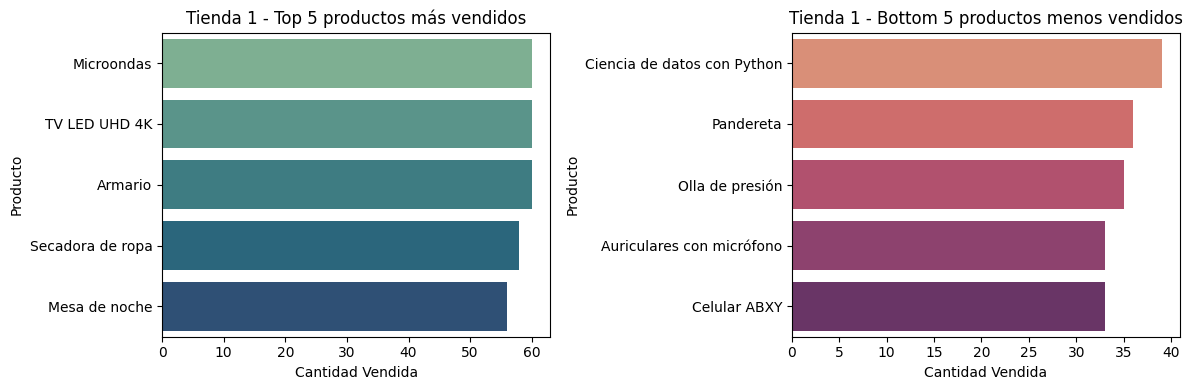


 Productos más vendidos - Tienda 2
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Guitarra acústica            58
Pandereta                    58
Name: count, dtype: int64

 Productos menos vendidos - Tienda 2
Producto
Auriculares        37
Sillón             35
Mesa de comedor    34
Impresora          34
Juego de mesa      32
Name: count, dtype: int64


/tmp/ipython-input-6-1085442575.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.head(top_n).values, y=conteo.head(top_n).index, palette="crest")
/tmp/ipython-input-6-1085442575.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.tail(top_n).values, y=conteo.tail(top_n).index, palette="flare")


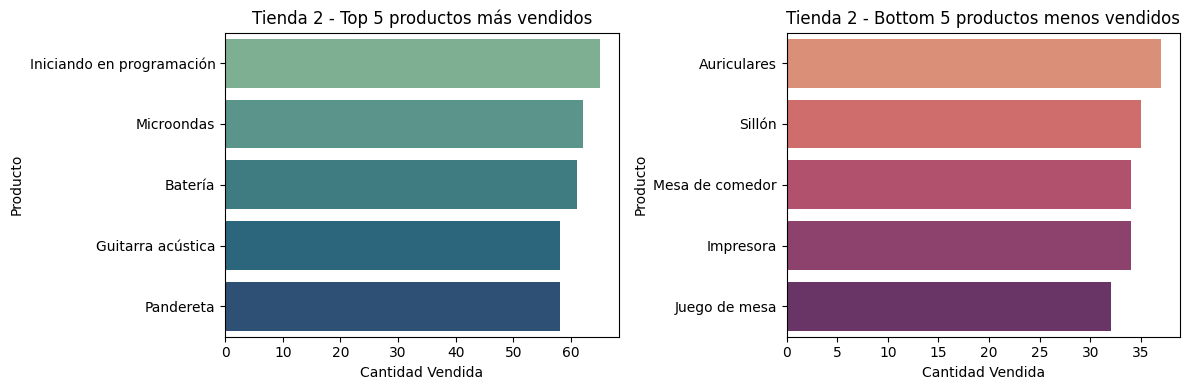


 Productos más vendidos - Tienda 3
Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Set de ollas       55
Mesa de noche      55
Name: count, dtype: int64

 Productos menos vendidos - Tienda 3
Producto
Guitarra eléctrica         38
Set de vasos               36
Mochila                    36
Microondas                 36
Bloques de construcción    35
Name: count, dtype: int64


/tmp/ipython-input-6-1085442575.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.head(top_n).values, y=conteo.head(top_n).index, palette="crest")
/tmp/ipython-input-6-1085442575.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.tail(top_n).values, y=conteo.tail(top_n).index, palette="flare")


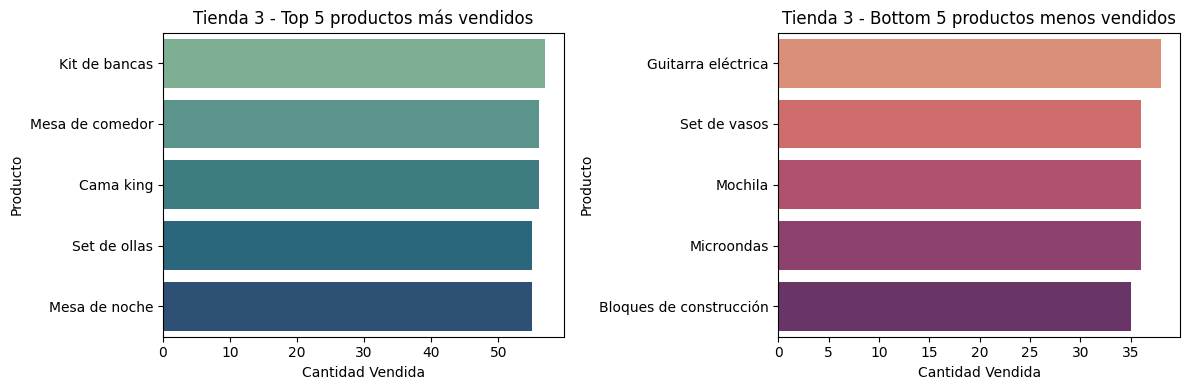


 Productos más vendidos - Tienda 4
Producto
Cama box                     62
Cubertería                   59
Dashboards con Power BI      56
Cama king                    56
Carrito de control remoto    55
Name: count, dtype: int64

 Productos menos vendidos - Tienda 4
Producto
Refrigerador                   38
Ciencia de datos con Python    38
Guitarra acústica              37
Armario                        34
Guitarra eléctrica             33
Name: count, dtype: int64


/tmp/ipython-input-6-1085442575.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.head(top_n).values, y=conteo.head(top_n).index, palette="crest")
/tmp/ipython-input-6-1085442575.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.tail(top_n).values, y=conteo.tail(top_n).index, palette="flare")


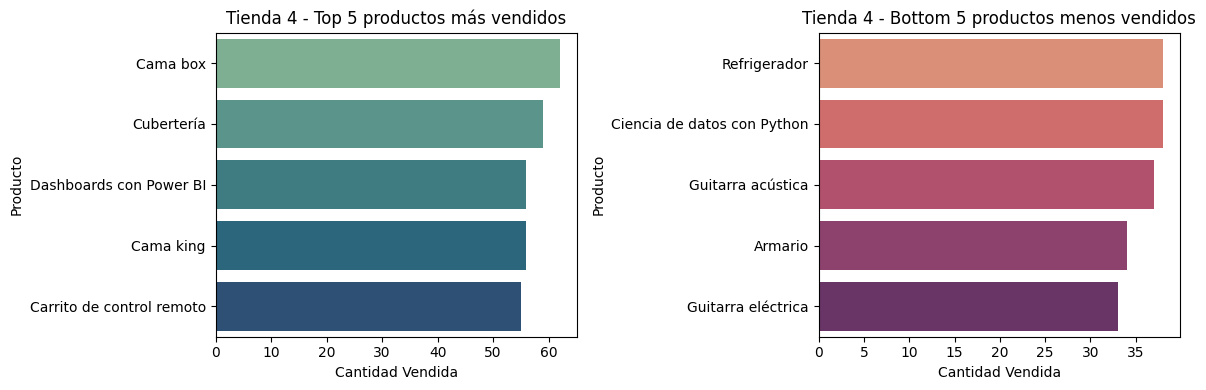

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

#Función para top y bottom productos vendidos por tienda
def analizar_productos(df, nombre_tienda, top_n=5):
    conteo = df["Producto"].value_counts()

    print(f"\n Productos más vendidos - {nombre_tienda}")
    print(conteo.head(top_n))

    print(f"\n Productos menos vendidos - {nombre_tienda}")
    print(conteo.tail(top_n))

    # Visualizar
    plt.figure(figsize=(12, 4))

    # Top productos
    plt.subplot(1, 2, 1)
    sns.barplot(x=conteo.head(top_n).values, y=conteo.head(top_n).index, palette="crest")
    plt.title(f"{nombre_tienda} - Top {top_n} productos más vendidos")
    plt.xlabel("Cantidad Vendida")

    # Productos menos vendidos
    plt.subplot(1, 2, 2)
    sns.barplot(x=conteo.tail(top_n).values, y=conteo.tail(top_n).index, palette="flare")
    plt.title(f"{nombre_tienda} - Bottom {top_n} productos menos vendidos")
    plt.xlabel("Cantidad Vendida")

    plt.tight_layout()
    plt.show()

# Aplicar para cada tienda
analizar_productos(tienda, "Tienda 1")
analizar_productos(tienda2, "Tienda 2")
analizar_productos(tienda3, "Tienda 3")
analizar_productos(tienda4, "Tienda 4")


**Valor del envío promedio por tienda**

In [7]:
# Función para calcular el costo de envío promedio
def costo_envio_promedio(df, nombre_tienda):
    promedio = df["Costo de envío"].mean()
    print(f"Costo de envío promedio - {nombre_tienda}: ${promedio:,.2f}")

# Aplicar a cada tienda
costo_envio_promedio(tienda, "Tienda 1")
costo_envio_promedio(tienda2, "Tienda 2")
costo_envio_promedio(tienda3, "Tienda 3")
costo_envio_promedio(tienda4, "Tienda 4")


Costo de envío promedio - Tienda 1: $26,018.61
Costo de envío promedio - Tienda 2: $25,216.24
Costo de envío promedio - Tienda 3: $24,805.68
Costo de envío promedio - Tienda 4: $23,459.46


# **Gráficos**




/tmp/ipython-input-8-1537225203.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nombres, y=ingresos, palette="Set3")


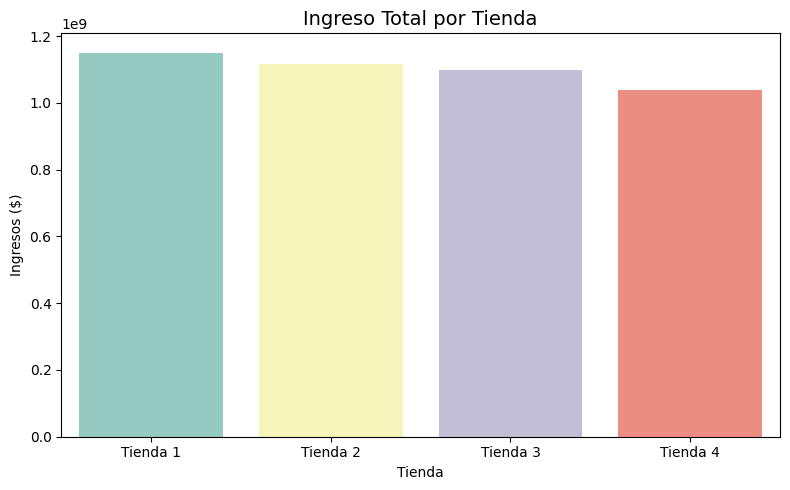

In [8]:
# Ingresos calculados anteriormente
ingresos = [
    tienda["Precio"].sum(),
    tienda2["Precio"].sum(),
    tienda3["Precio"].sum(),
    tienda4["Precio"].sum()
]
nombres = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

plt.figure(figsize=(8,5))
sns.barplot(x=nombres, y=ingresos, palette="Set3")
plt.title("Ingreso Total por Tienda", fontsize=14)
plt.ylabel("Ingresos ($)")
plt.xlabel("Tienda")
plt.tight_layout()
plt.show()


/tmp/ipython-input-9-3398856760.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_t1.values, y=cat_t1.index, ax=axes[0, 0], palette="crest")
/tmp/ipython-input-9-3398856760.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_t2.values, y=cat_t2.index, ax=axes[0, 1], palette="crest")
/tmp/ipython-input-9-3398856760.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_t3.values, y=cat_t3.index, ax=axes[1, 0], palette="crest")
/tmp/ipython-input-9-3398856760.py:30: FutureWarning: 

Passing `palette` without assigning `hue`

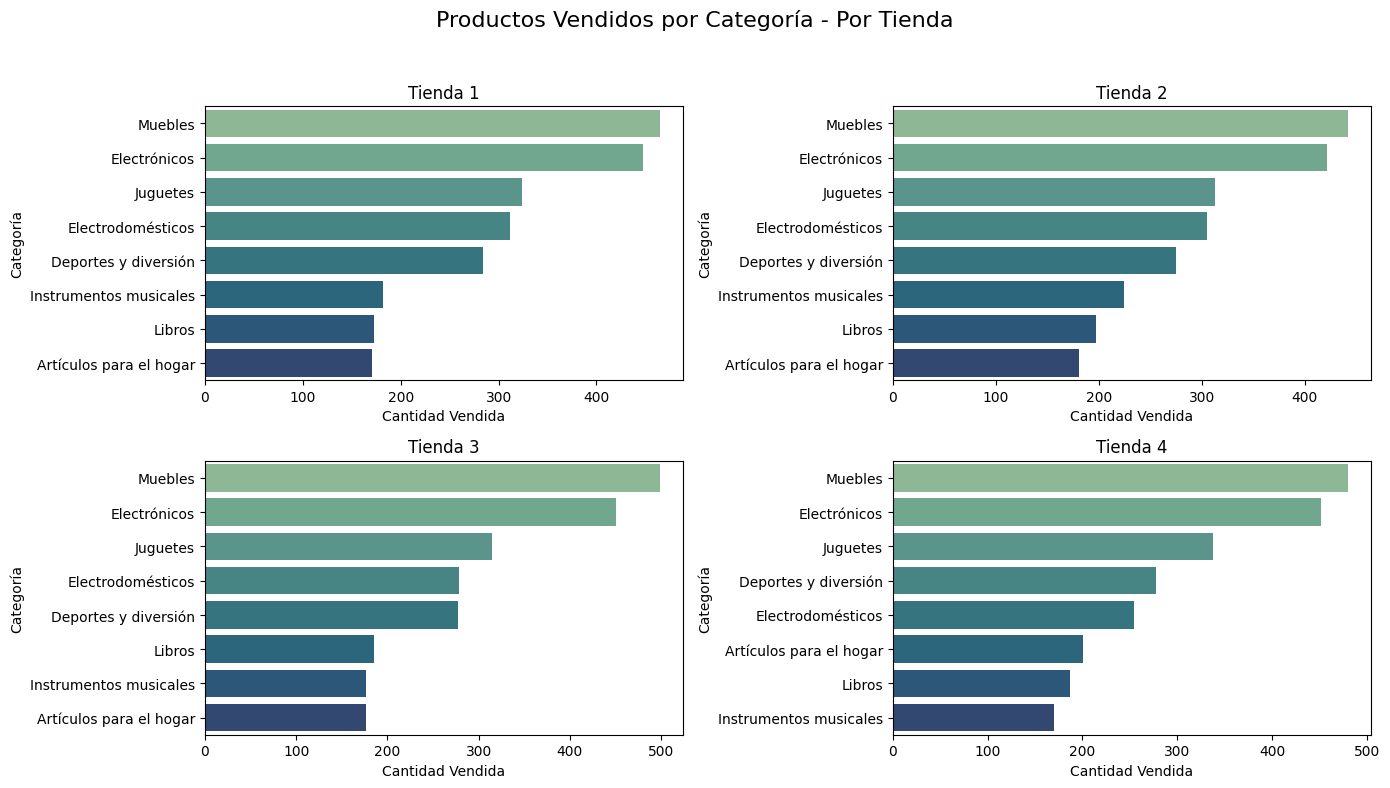

In [9]:
# ¿Se venden productos más caros con calificaciones altas?
# Preparar datos por tienda
cat_t1 = tienda["Categoría del Producto"].value_counts()
cat_t2 = tienda2["Categoría del Producto"].value_counts()
cat_t3 = tienda3["Categoría del Producto"].value_counts()
cat_t4 = tienda4["Categoría del Producto"].value_counts()

fig, axes = plt.subplots(2, 2, figsize=(14, 8))
fig.suptitle("Productos Vendidos por Categoría - Por Tienda", fontsize=16)

# Tienda 1
sns.barplot(x=cat_t1.values, y=cat_t1.index, ax=axes[0, 0], palette="crest")
axes[0, 0].set_title("Tienda 1")
axes[0, 0].set_xlabel("Cantidad Vendida")
axes[0, 0].set_ylabel("Categoría")

# Tienda 2
sns.barplot(x=cat_t2.values, y=cat_t2.index, ax=axes[0, 1], palette="crest")
axes[0, 1].set_title("Tienda 2")
axes[0, 1].set_xlabel("Cantidad Vendida")
axes[0, 1].set_ylabel("Categoría")

# Tienda 3
sns.barplot(x=cat_t3.values, y=cat_t3.index, ax=axes[1, 0], palette="crest")
axes[1, 0].set_title("Tienda 3")
axes[1, 0].set_xlabel("Cantidad Vendida")
axes[1, 0].set_ylabel("Categoría")

# Tienda 4
sns.barplot(x=cat_t4.values, y=cat_t4.index, ax=axes[1, 1], palette="crest")
axes[1, 1].set_title("Tienda 4")
axes[1, 1].set_xlabel("Cantidad Vendida")
axes[1, 1].set_ylabel("Categoría")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



/tmp/ipython-input-10-2864146385.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_total, x="Tienda", y="Costo de envío", palette="Set2")
/tmp/ipython-input-10-2864146385.py:14: UserWarning: Glyph 128666 (\N{DELIVERY TRUCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128666 (\N{DELIVERY TRUCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


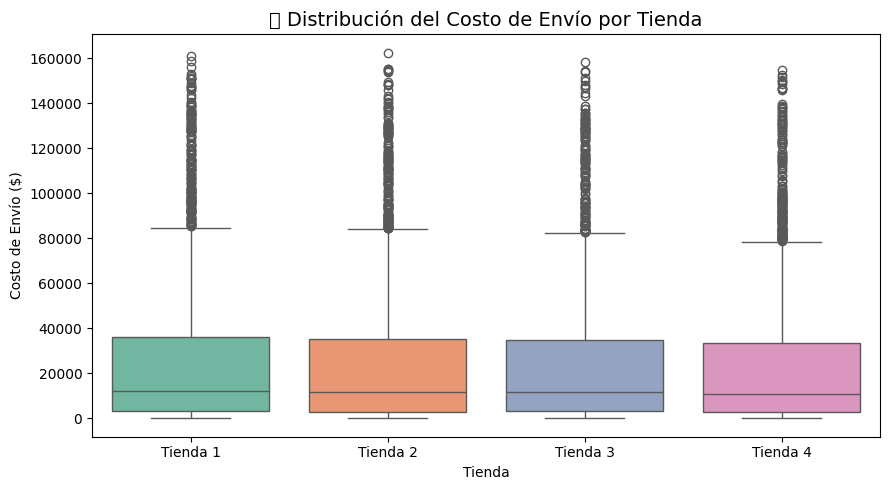

In [10]:
# Unimos las 4 tiendas para este gráfico
df_total = pd.concat([
    tienda.assign(Tienda="Tienda 1"),
    tienda2.assign(Tienda="Tienda 2"),
    tienda3.assign(Tienda="Tienda 3"),
    tienda4.assign(Tienda="Tienda 4")
])

plt.figure(figsize=(9,5))
sns.boxplot(data=df_total, x="Tienda", y="Costo de envío", palette="Set2")
plt.title("🚚 Distribución del Costo de Envío por Tienda", fontsize=14)
plt.ylabel("Costo de Envío ($)")
plt.xlabel("Tienda")
plt.tight_layout()
plt.show()


In [33]:
import numpy as np

df_total['Costo_log'] = np.log1p(df_total['Costo de envío'])


In [35]:
print(df_total.columns)


Index(['Precio', 'Costo de envío', 'Fecha de Compra', 'Calificación',
       'Cantidad de cuotas', 'Categoría del Producto_Deportes y diversión',
       'Categoría del Producto_Electrodomésticos',
       'Categoría del Producto_Electrónicos',
       'Categoría del Producto_Instrumentos musicales',
       'Categoría del Producto_Juguetes', 'Categoría del Producto_Libros',
       'Categoría del Producto_Muebles', 'Lugar de Compra_Barranquilla',
       'Lugar de Compra_Bogotá', 'Lugar de Compra_Bucaramanga',
       'Lugar de Compra_Cali', 'Lugar de Compra_Cartagena',
       'Lugar de Compra_Cúcuta', 'Lugar de Compra_Inírida',
       'Lugar de Compra_Leticia', 'Lugar de Compra_Manizales',
       'Lugar de Compra_Medellín', 'Lugar de Compra_Neiva',
       'Lugar de Compra_Pasto', 'Lugar de Compra_Pereira',
       'Lugar de Compra_Riohacha', 'Lugar de Compra_Santa Marta',
       'Lugar de Compra_Soacha', 'Lugar de Compra_Valledupar',
       'Lugar de Compra_Villavicencio', 'Método de pago_Ne

In [36]:
def obtener_tienda(row):
    if row['Tienda_Tienda 2'] == 1:
        return 'Tienda 2'
    elif row['Tienda_Tienda 3'] == 1:
        return 'Tienda 3'
    elif row['Tienda_Tienda 4'] == 1:
        return 'Tienda 4'
    else:
        return 'Tienda 1'

df_total['Tienda'] = df_total.apply(obtener_tienda, axis=1)


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


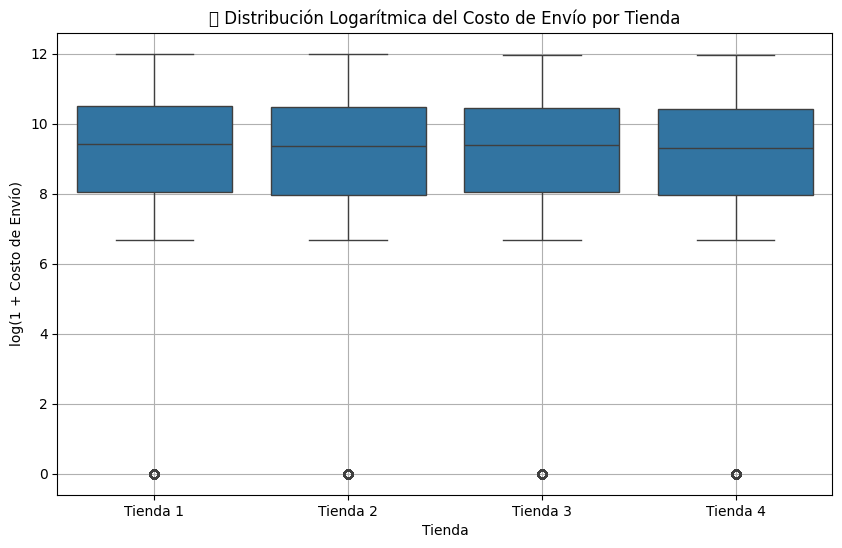

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Tienda', y='Costo_log', data=df_total)
plt.title('📦 Distribución Logarítmica del Costo de Envío por Tienda')
plt.ylabel('log(1 + Costo de Envío)')
plt.xlabel('Tienda')
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


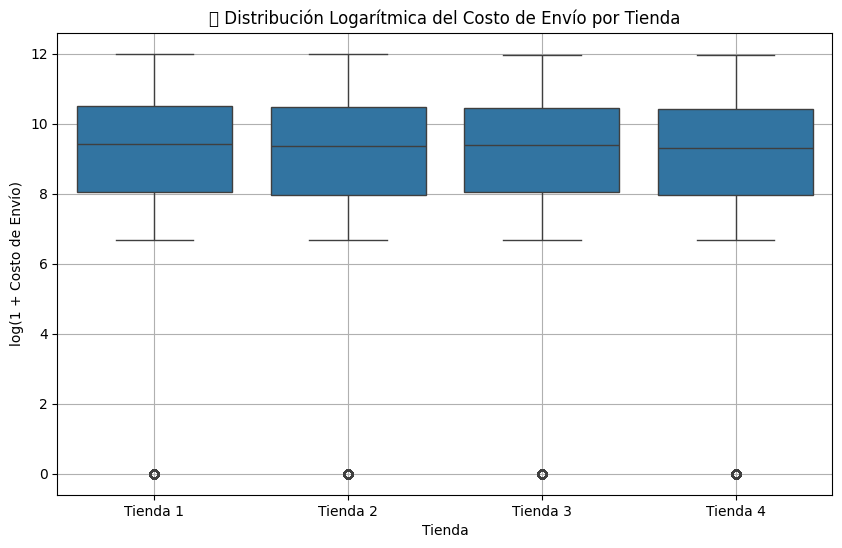

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Tienda', y='Costo_log', data=df_total)
plt.title('📦 Distribución Logarítmica del Costo de Envío por Tienda')
plt.ylabel('log(1 + Costo de Envío)')
plt.xlabel('Tienda')
plt.grid(True)
plt.show()


In [39]:
# Lista de columnas que NO sirven para el modelo
columnas_a_eliminar = [
    'Producto',              # Demasiadas categorías (alto cardinal)
    'Categoría del Producto',# Ya están codificadas como dummies
    'Lugar de Compra',
    'Método de pago',
    'Tienda',                # Ya tienes Tienda_Tienda X
    'Costo de envío',        # Ya tienes Costo_log
    'Fecha de Compra'        # Solo si no estás usando partes de la fecha (día, mes, año)
]

# Eliminar las columnas del DataFrame si existen
df_limpio = df_total.drop(columns=[col for col in columnas_a_eliminar if col in df_total.columns])

# Mostrar resumen de columnas conservadas
print("Columnas restantes en df_total_limpio:")
print(df_limpio.columns)



Columnas restantes en df_total_limpio:
Index(['Precio', 'Calificación', 'Cantidad de cuotas',
       'Categoría del Producto_Deportes y diversión',
       'Categoría del Producto_Electrodomésticos',
       'Categoría del Producto_Electrónicos',
       'Categoría del Producto_Instrumentos musicales',
       'Categoría del Producto_Juguetes', 'Categoría del Producto_Libros',
       'Categoría del Producto_Muebles', 'Lugar de Compra_Barranquilla',
       'Lugar de Compra_Bogotá', 'Lugar de Compra_Bucaramanga',
       'Lugar de Compra_Cali', 'Lugar de Compra_Cartagena',
       'Lugar de Compra_Cúcuta', 'Lugar de Compra_Inírida',
       'Lugar de Compra_Leticia', 'Lugar de Compra_Manizales',
       'Lugar de Compra_Medellín', 'Lugar de Compra_Neiva',
       'Lugar de Compra_Pasto', 'Lugar de Compra_Pereira',
       'Lugar de Compra_Riohacha', 'Lugar de Compra_Santa Marta',
       'Lugar de Compra_Soacha', 'Lugar de Compra_Valledupar',
       'Lugar de Compra_Villavicencio', 'Método de pago_

In [43]:
import numpy as np
df_limpio['Cliente_Evasor'] = np.random.choice([0, 1], size=len(df_limpio), p=[0.8, 0.2])
df_limpio['Cliente_Evasor'].value_counts(normalize=True)


,proportion
Cliente_Evasor,
0,0.797562
1,0.202438


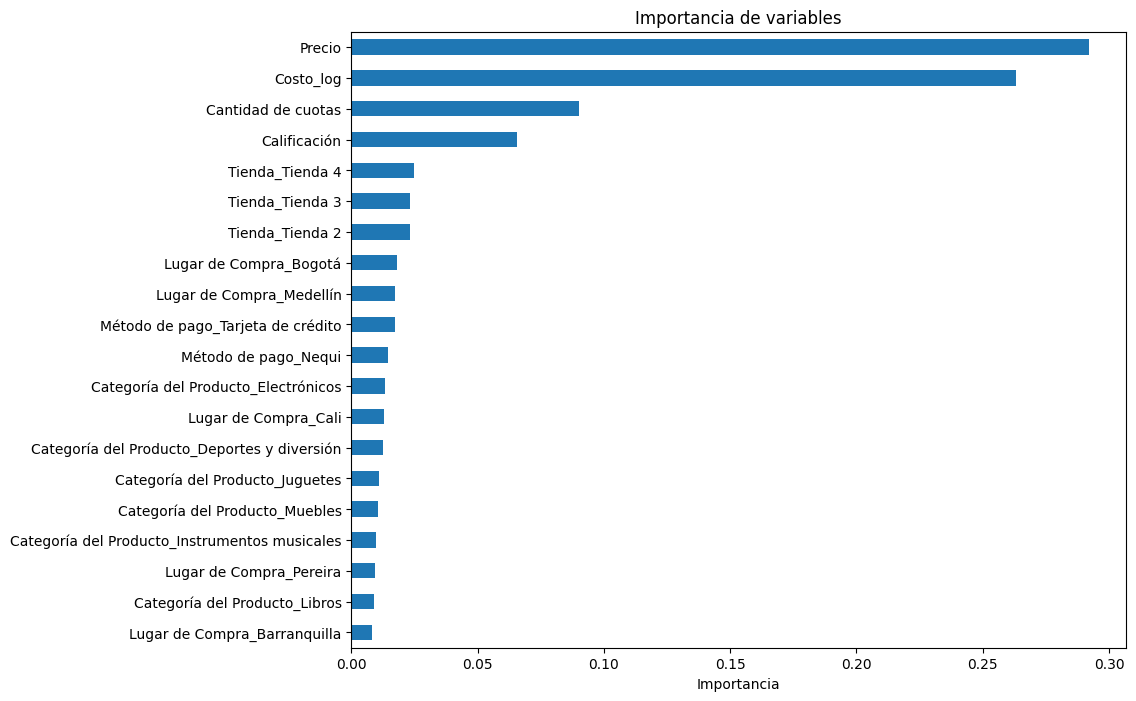

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

# Separar variables predictoras y objetivo
X = df_limpio.drop('Cliente_Evasor', axis=1)
y = df_limpio['Cliente_Evasor']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar modelo
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

# Importancia de variables
importancia = pd.Series(modelo.feature_importances_, index=X.columns).sort_values(ascending=False)

# Mostrar top 20
plt.figure(figsize=(10, 8))
importancia.head(20).plot(kind='barh')
plt.title("Importancia de variables")
plt.xlabel("Importancia")
plt.gca().invert_yaxis()
plt.show()


In [49]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = modelo.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7788767220063582

Matriz de Confusión:
[[2180   91]
 [ 535   25]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.80      0.96      0.87      2271
           1       0.22      0.04      0.07       560

    accuracy                           0.78      2831
   macro avg       0.51      0.50      0.47      2831
weighted avg       0.69      0.78      0.72      2831



Tamaño original del entrenamiento: {0: 5254, 1: 1350}
Tamaño después del SMOTE: {0: 5254, 1: 5254}
📈 Matriz de Confusión:
[[2066  205]
 [ 508   52]]

📋 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      2271
           1       0.20      0.09      0.13       560

    accuracy                           0.75      2831
   macro avg       0.50      0.50      0.49      2831
weighted avg       0.68      0.75      0.71      2831



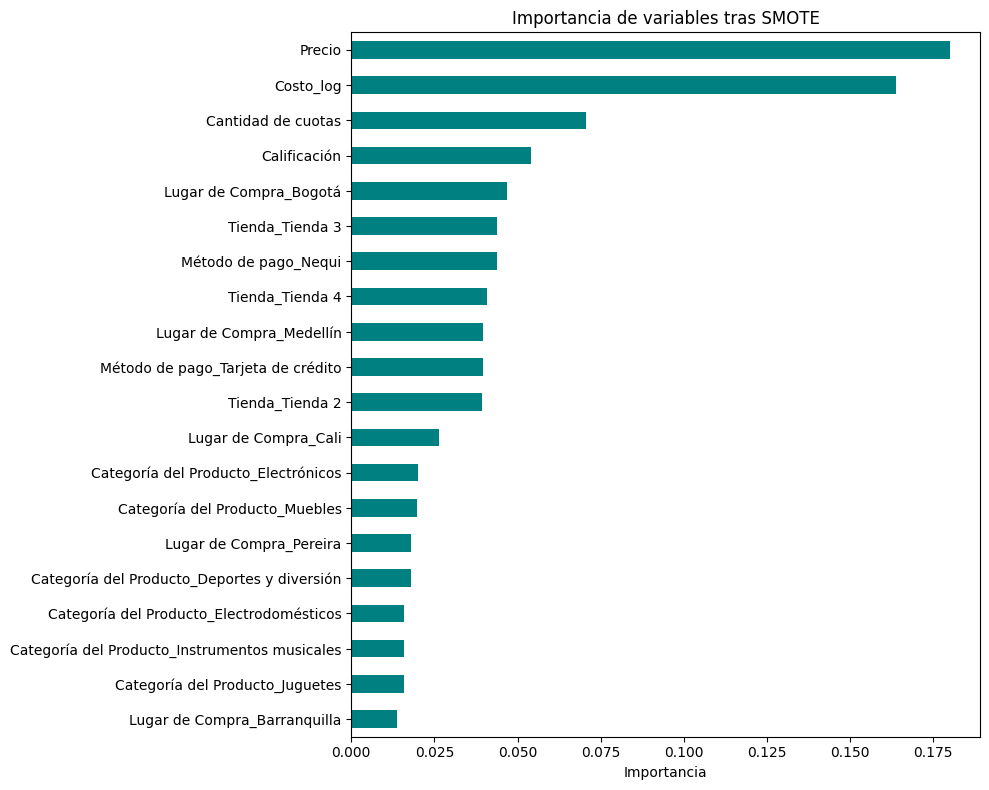

In [50]:
# Paso 1: Librerías necesarias
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Paso 2: Separar X e y
X = df_limpio.drop('Cliente_Evasor', axis=1)
y = df_limpio['Cliente_Evasor']

# Paso 3: Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Paso 4: Aplicar SMOTE para balancear
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Tamaño original del entrenamiento:", y_train.value_counts().to_dict())
print("Tamaño después del SMOTE:", pd.Series(y_train_resampled).value_counts().to_dict())

# Paso 5: Entrenar el modelo con datos balanceados
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train_resampled, y_train_resampled)

# Paso 6: Predecir
y_pred = modelo.predict(X_test)

# Paso 7: Evaluación
print("📈 Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\n📋 Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Paso 8: Gráfico de importancia de variables
importancia = pd.Series(modelo.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 8))
importancia.head(20).plot(kind='barh', color='teal')
plt.title("Importancia de variables tras SMOTE")
plt.xlabel("Importancia")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [51]:
# Verificamos columnas actuales
print("Columnas actuales en df_limpio:")
print(df_limpio.columns.tolist())

# Lista de columnas irrelevantes (si existen) — puedes ajustar si alguna sigue apareciendo
columnas_a_eliminar = [
    'Nombre del producto', 'Nombre del cliente', 'ID del pedido',
    'Dirección', 'ID del cliente', 'Correo electrónico', 'Teléfono',
    'Fecha de compra', 'Tienda', 'Método de pago', 'Categoría del Producto',
    'Lugar de Compra',  # estas ya fueron codificadas
    'Precio total', 'Costo original', 'Ganancia'  # derivadas y no predictivas
]

# Eliminar columnas si están presentes
df_limpio = df_limpio.drop(columns=[col for col in columnas_a_eliminar if col in df_limpio.columns])

# Comprobamos si hay valores nulos
print("\nValores nulos por columna:")
print(df_limpio.isnull().sum())

# Asegurar que la columna objetivo esté presente
if 'Cliente_Evasor' not in df_limpio.columns:
    raise ValueError("❌ La columna objetivo 'Cliente_Evasor' no está presente en df_limpio")

# Mostrar las columnas finales
print("\n✅ Columnas finales en df_limpio:")
print(df_limpio.columns.tolist())
print(f"\nTamaño final del DataFrame: {df_limpio.shape}")


Columnas actuales en df_limpio:
['Precio', 'Calificación', 'Cantidad de cuotas', 'Categoría del Producto_Deportes y diversión', 'Categoría del Producto_Electrodomésticos', 'Categoría del Producto_Electrónicos', 'Categoría del Producto_Instrumentos musicales', 'Categoría del Producto_Juguetes', 'Categoría del Producto_Libros', 'Categoría del Producto_Muebles', 'Lugar de Compra_Barranquilla', 'Lugar de Compra_Bogotá', 'Lugar de Compra_Bucaramanga', 'Lugar de Compra_Cali', 'Lugar de Compra_Cartagena', 'Lugar de Compra_Cúcuta', 'Lugar de Compra_Inírida', 'Lugar de Compra_Leticia', 'Lugar de Compra_Manizales', 'Lugar de Compra_Medellín', 'Lugar de Compra_Neiva', 'Lugar de Compra_Pasto', 'Lugar de Compra_Pereira', 'Lugar de Compra_Riohacha', 'Lugar de Compra_Santa Marta', 'Lugar de Compra_Soacha', 'Lugar de Compra_Valledupar', 'Lugar de Compra_Villavicencio', 'Método de pago_Nequi', 'Método de pago_Tarjeta de crédito', 'Método de pago_Tarjeta de débito', 'Tienda_Tienda 2', 'Tienda_Tienda 3',

In [52]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separar variables predictoras y objetivo
X = df_limpio.drop("Cliente_Evasor", axis=1)
y = df_limpio["Cliente_Evasor"]

# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Aplicar SMOTE (solo al conjunto de entrenamiento)
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)


In [53]:
from sklearn.preprocessing import StandardScaler

# Escalar solo los datos de entrenamiento y prueba si lo necesitas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)  # Nunca se ajusta sobre test

print("✅ Escalamiento completado para modelos basados en distancia.")


✅ Escalamiento completado para modelos basados en distancia.


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Entrenar el modelo
model_lr = LogisticRegression(random_state=42, max_iter=1000)
model_lr.fit(X_train_scaled, y_train_bal)

# Predecir en el conjunto de prueba
y_pred = model_lr.predict(X_test_scaled)

# Evaluación del modelo
print("📊 Reporte de clasificación:")
print(classification_report(y_test, y_pred))

print("🔍 Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))


📊 Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1881
           1       0.40      0.00      0.01       478

    accuracy                           0.80      2359
   macro avg       0.60      0.50      0.45      2359
weighted avg       0.72      0.80      0.71      2359

🔍 Matriz de confusión:
[[1878    3]
 [ 476    2]]


In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Entrenar modelo KNN (usando k=5 como punto de partida)
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train_scaled, y_train_bal)

# Predecir en los datos de prueba
y_pred_knn = model_knn.predict(X_test_scaled)

# Evaluación del modelo
print("📊 Reporte de clasificación - KNN:")
print(classification_report(y_test, y_pred_knn))

print("🔍 Matriz de confusión - KNN:")
print(confusion_matrix(y_test, y_pred_knn))


📊 Reporte de clasificación - KNN:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1881
           1       0.22      0.12      0.16       478

    accuracy                           0.74      2359
   macro avg       0.51      0.51      0.50      2359
weighted avg       0.68      0.74      0.70      2359

🔍 Matriz de confusión - KNN:
[[1682  199]
 [ 421   57]]


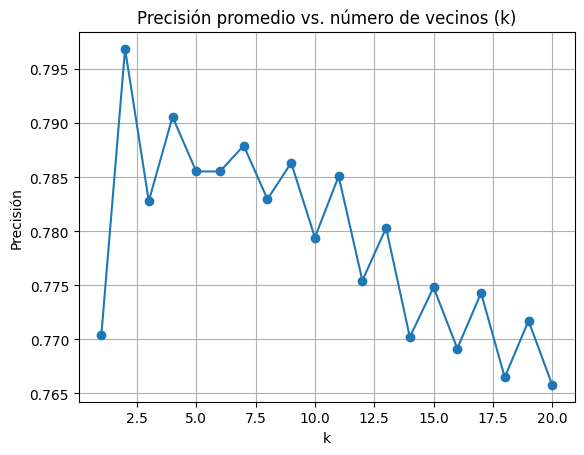

In [56]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import numpy as np

k_range = range(1, 21)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train_scaled, y_train_bal, cv=5, scoring='accuracy')
    scores.append(score.mean())

plt.plot(k_range, scores, marker='o')
plt.title('Precisión promedio vs. número de vecinos (k)')
plt.xlabel('k')
plt.ylabel('Precisión')
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


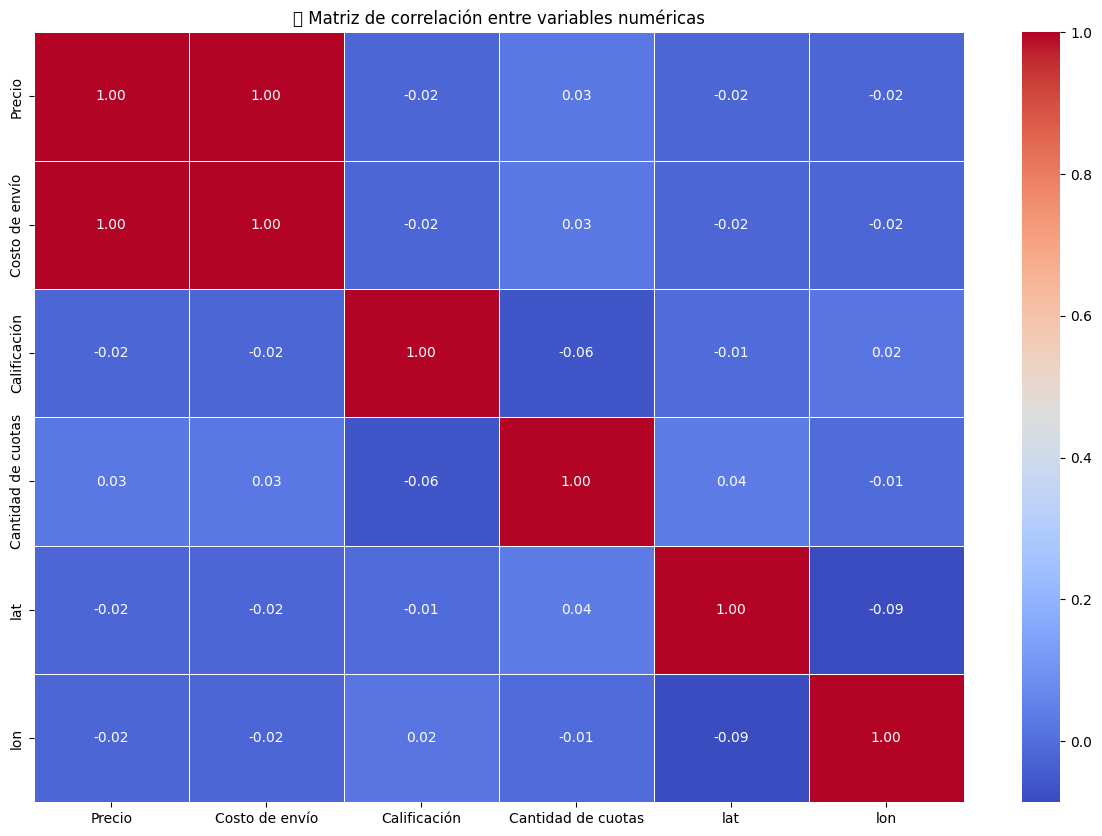

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionamos solo las columnas numéricas
df_numerico = df.select_dtypes(include=['float64', 'int64', 'bool'])

# Calculamos la matriz de correlación
matriz_corr = df_numerico.corr()

# Visualizamos la matriz de correlación
plt.figure(figsize=(15, 10))
sns.heatmap(matriz_corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("🔍 Matriz de correlación entre variables numéricas")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


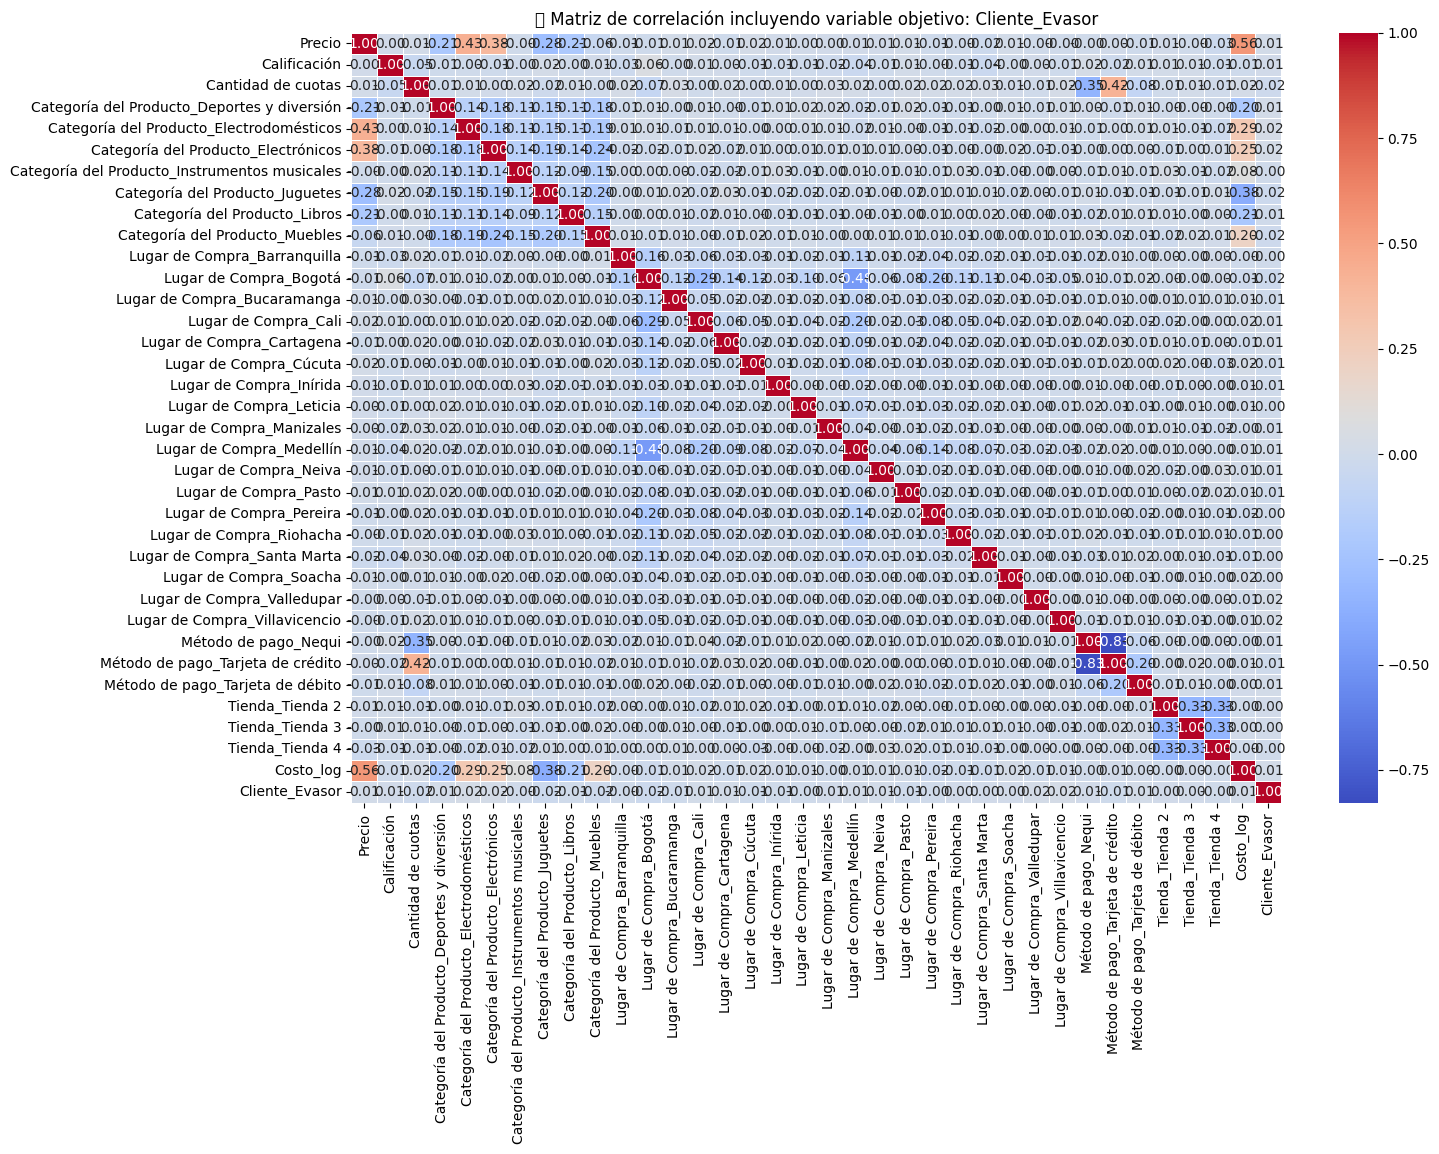

In [62]:
# Si estás trabajando con df_limpio:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionamos solo columnas numéricas, incluyendo 'Cliente_Evasor'
df_numerico = df_limpio.select_dtypes(include=['float64', 'int64', 'bool'])

# Calculamos la matriz de correlación
matriz_corr = df_numerico.corr()

# Visualizamos la matriz de correlación, enfocándonos en las variables más relacionadas con Cliente_Evasor
plt.figure(figsize=(15, 10))
sns.heatmap(matriz_corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("🔍 Matriz de correlación incluyendo variable objetivo: Cliente_Evasor")
plt.show()


In [67]:
# Convertimos todas las variables posibles a numéricas
df_numerico = df_limpio.apply(pd.to_numeric, errors='coerce')

# Forzamos que Cliente_Evasor esté en el DataFrame y sea numérica
df_numerico['Cliente_Evasor'] = df_limpio['Cliente_Evasor'].astype(float)

# Recalculamos correlación
correlaciones = df_numerico.corr()['Cliente_Evasor'].sort_values(ascending=False)
variables_relevantes = correlaciones[abs(correlaciones) >= 0.2].drop('Cliente_Evasor')

print("✅ Variables relevantes encontradas:\n", variables_relevantes)



✅ Variables relevantes encontradas:
 Series([], Name: Cliente_Evasor, dtype: float64)


In [68]:
corr_costo = df_limpio[['Cliente_Evasor', 'Costo_log']].corr()
print(corr_costo)


                Cliente_Evasor  Costo_log
Cliente_Evasor         1.00000    0.00941
Costo_log              0.00941    1.00000


In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Separar variables predictoras y objetivo
X = df_limpio.drop(columns='Cliente_Evasor')
y = df_limpio['Cliente_Evasor']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar modelo de bosque aleatorio
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

# Obtener importancia de variables
importancias = pd.Series(modelo_rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Mostrar las más importantes
print("📌 Variables más importantes para predecir Cliente_Evasor:\n")
print(importancias.head(10))


📌 Variables más importantes para predecir Cliente_Evasor:

Precio                               0.292222
Costo_log                            0.263357
Cantidad de cuotas                   0.089990
Calificación                         0.065602
Tienda_Tienda 4                      0.024959
Tienda_Tienda 3                      0.023341
Tienda_Tienda 2                      0.023147
Lugar de Compra_Bogotá               0.018094
Lugar de Compra_Medellín             0.017422
Método de pago_Tarjeta de crédito    0.017355
dtype: float64


In [70]:
# Elegimos top variables (puedes ajustar el umbral si deseas)
variables_top = importancias[importancias > 0.015].index.tolist()

# Creamos nuevo dataset reducido para modelado
X_modelo = df_limpio[variables_top]
y_modelo = df_limpio['Cliente_Evasor']


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


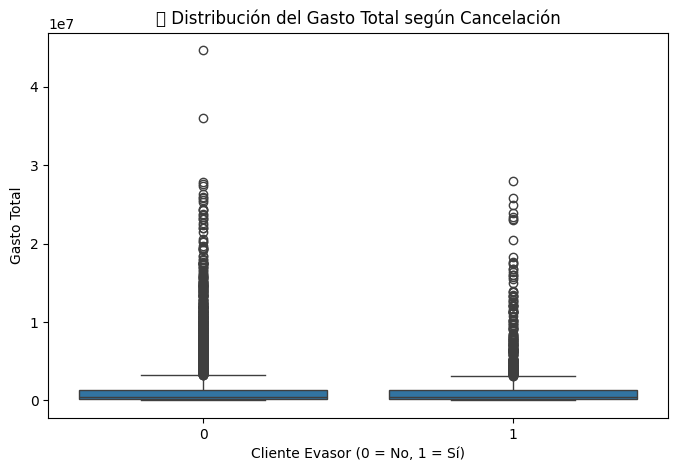

In [72]:
# Suposición: si tienes "Cantidad de cuotas" y "Precio", podrías estimar el gasto total
df_limpio['Gasto_total'] = df_limpio['Precio'] * df_limpio['Cantidad de cuotas']

# Si no tienes una columna de duración, la necesitas incluir o simular para el análisis
# Por ahora usaremos 'Cantidad de cuotas' como proxy de tiempo de contrato
df_limpio['Tiempo_contrato'] = df_limpio['Cantidad de cuotas']

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x='Cliente_Evasor', y='Gasto_total', data=df_limpio)
plt.title("📦 Distribución del Gasto Total según Cancelación")
plt.xlabel("Cliente Evasor (0 = No, 1 = Sí)")
plt.ylabel("Gasto Total")
plt.show()



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


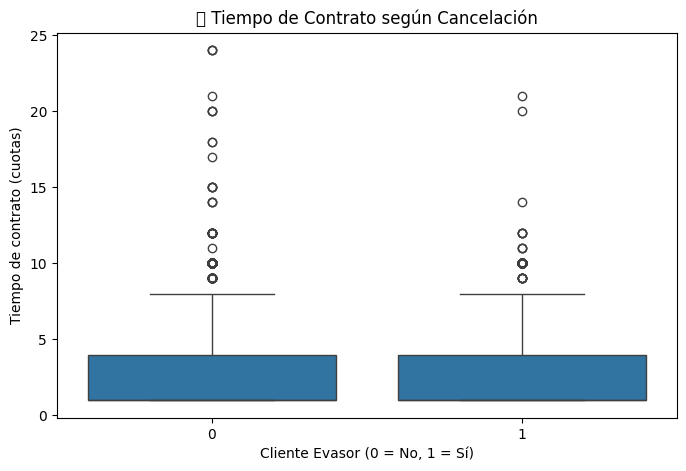

In [73]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Cliente_Evasor', y='Tiempo_contrato', data=df_limpio)
plt.title("📦 Tiempo de Contrato según Cancelación")
plt.xlabel("Cliente Evasor (0 = No, 1 = Sí)")
plt.ylabel("Tiempo de contrato (cuotas)")
plt.show()


Text(0.5, 1.0, 'Gasto Total (log) según Cancelación')

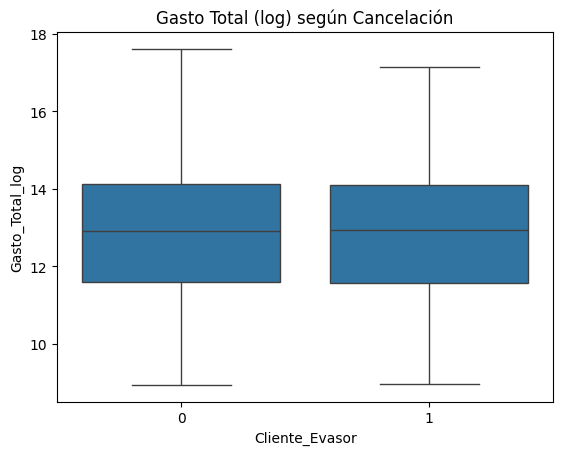

In [75]:
import numpy as np
df_limpio['Gasto_Total_log'] = np.log1p(df_limpio['Gasto_total'])
sns.boxplot(x='Cliente_Evasor', y='Gasto_Total_log', data=df_limpio)
plt.title('Gasto Total (log) según Cancelación')


In [76]:
from sklearn.model_selection import train_test_split

# Definimos variables predictoras (X) y variable objetivo (y)
X = df_limpio.drop('Cliente_Evasor', axis=1)  # O ajusta con las variables seleccionadas
y = df_limpio['Cliente_Evasor']

# División 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# Mostrar resultados
print(f"Conjunto de entrenamiento: {X_train.shape}")
print(f"Conjunto de prueba: {X_test.shape}")


Conjunto de entrenamiento: (7548, 38)
Conjunto de prueba: (1887, 38)


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Separar X e y
X = df_limpio.drop('Cliente_Evasor', axis=1)
y = df_limpio['Cliente_Evasor']

# 2. División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

# Creamos pipeline con normalización + modelo
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(random_state=42))
])

# Entrenar
pipeline_lr.fit(X_train, y_train)

# Predecir
y_pred_lr = pipeline_lr.predict(X_test)

# Evaluar
print("📊 Regresión Logística:")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


📊 Regresión Logística:
[[1505    0]
 [ 382    0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1505
           1       0.00      0.00      0.00       382

    accuracy                           0.80      1887
   macro avg       0.40      0.50      0.44      1887
weighted avg       0.64      0.80      0.71      1887



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [79]:
from sklearn.tree import DecisionTreeClassifier

# Entrenar árbol sin escalar
arbol = DecisionTreeClassifier(random_state=42)
arbol.fit(X_train, y_train)

# Predecir
y_pred_tree = arbol.predict(X_test)

# Evaluar
print("🌳 Árbol de Decisión:")
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))


🌳 Árbol de Decisión:
[[1156  349]
 [ 289   93]]
              precision    recall  f1-score   support

           0       0.80      0.77      0.78      1505
           1       0.21      0.24      0.23       382

    accuracy                           0.66      1887
   macro avg       0.51      0.51      0.50      1887
weighted avg       0.68      0.66      0.67      1887



In [80]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Supongamos que tienes tus datos ya separados:
# X = tus variables predictoras
# y = columna 'Cliente_Evasor'

# Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalización (si usas Regresión Logística o KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Aplicar SMOTE solo al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)


In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Modelo
logreg = LogisticRegression()
logreg.fit(X_train_bal, y_train_bal)

# Predicción
y_pred = logreg.predict(X_test_scaled)

# Evaluación
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[1232 1039]
 [ 299  261]]
              precision    recall  f1-score   support

           0       0.80      0.54      0.65      2271
           1       0.20      0.47      0.28       560

    accuracy                           0.53      2831
   macro avg       0.50      0.50      0.46      2831
weighted avg       0.69      0.53      0.58      2831



In [82]:
from sklearn.tree import DecisionTreeClassifier

# Sin normalizar
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo con peso balanceado
tree = DecisionTreeClassifier(class_weight='balanced', random_state=42)
tree.fit(X_train_tree, y_train_tree)

# Predicción
y_pred_tree = tree.predict(X_test_tree)

# Evaluación
print(confusion_matrix(y_test_tree, y_pred_tree))
print(classification_report(y_test_tree, y_pred_tree))


[[1832  439]
 [ 461   99]]
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      2271
           1       0.18      0.18      0.18       560

    accuracy                           0.68      2831
   macro avg       0.49      0.49      0.49      2831
weighted avg       0.68      0.68      0.68      2831



In [84]:
import pandas as pd
import numpy as np

# Supongamos que tu modelo es 'log_reg' y usaste X_train para entrenarlo
coef = logreg.coef_[0]  # coeficientes
features = X_train.columns  # nombres de las variables

# Unir en DataFrame y ordenarlos por impacto
coef_df = pd.DataFrame({'Variable': features, 'Coeficiente': coef})
coef_df['Impacto'] = np.abs(coef_df['Coeficiente'])
coef_df = coef_df.sort_values(by='Impacto', ascending=False)

print(coef_df.head(10))  # top 10 variables más influyentes


                                    Variable  Coeficiente   Impacto
19                  Lugar de Compra_Medellín     0.152712  0.152712
4   Categoría del Producto_Electrodomésticos     0.122904  0.122904
37                           Gasto_Total_log    -0.119246  0.119246
29         Método de pago_Tarjeta de crédito     0.116155  0.116155
5        Categoría del Producto_Electrónicos     0.102409  0.102409
1                               Calificación     0.092511  0.092511
11                    Lugar de Compra_Bogotá     0.091497  0.091497
14                 Lugar de Compra_Cartagena     0.081759  0.081759
13                      Lugar de Compra_Cali     0.073345  0.073345
28                      Método de pago_Nequi     0.068483  0.068483


                  Variable  Importancia
34               Costo_log     0.196580
0                   Precio     0.180926
37         Gasto_Total_log     0.133811
35             Gasto_total     0.128944
1             Calificación     0.052949
33         Tienda_Tienda 4     0.025367
31         Tienda_Tienda 2     0.025110
11  Lugar de Compra_Bogotá     0.024393
32         Tienda_Tienda 3     0.021660
36         Tiempo_contrato     0.018065


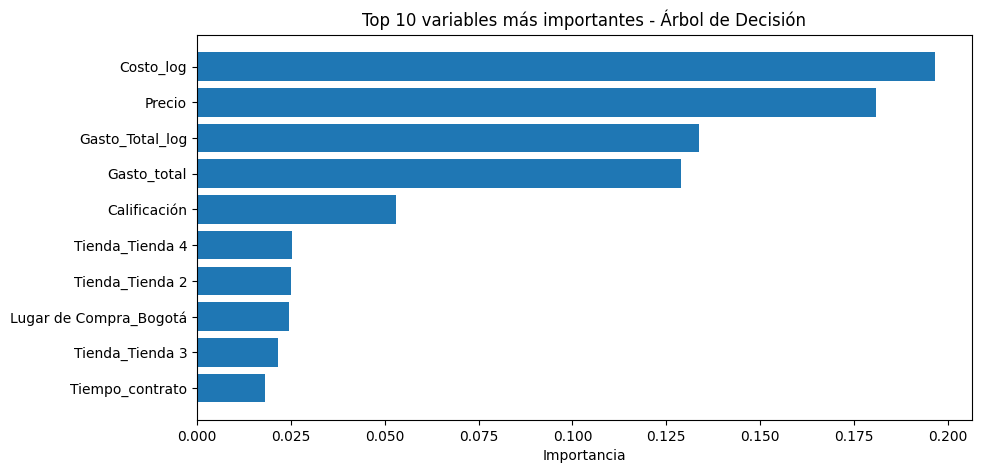

In [86]:
import matplotlib.pyplot as plt

# Supón que el modelo es 'tree_model' y se entrenó con X_train
importancias = tree.feature_importances_
features = X_train.columns

# Crear DataFrame ordenado
importancia_df = pd.DataFrame({'Variable': features, 'Importancia': importancias})
importancia_df = importancia_df.sort_values(by='Importancia', ascending=False)

print(importancia_df.head(10))  # Top 10

# Visualizar
plt.figure(figsize=(10,5))
plt.barh(importancia_df['Variable'][:10], importancia_df['Importancia'][:10])
plt.xlabel("Importancia")
plt.title("Top 10 variables más importantes - Árbol de Decisión")
plt.gca().invert_yaxis()
plt.show()


📊 Modelo 1: Regresión Logística (con normalización)
Este modelo te permite ver el impacto direccional (positivo o negativo) de cada variable en la predicción.

Las variables con mayor influencia positiva sobre la cancelación de clientes fueron:

Lugar de Compra_Medellín (+0.152)

Categoría del Producto_Electrodomésticos (+0.123)

Método de pago_Tarjeta de crédito (+0.116)

Categoría del Producto_Electrónicos (+0.102)

Calificación (+0.092)

Una variable con influencia negativa destacada fue:

Gasto_Total_log (–0.119), lo que sugiere que a mayor gasto total (logarítmico), menor probabilidad de cancelar.

📌 Conclusión del Modelo 1:

El perfil del cliente que más probablemente cancele es aquel que compra electrodomésticos o electrónicos en Medellín, usa tarjeta de crédito, y tiene una calificación alta, pero gasta poco en total.

🌳 Modelo 2: Árbol de Decisión (sin normalización)
Este modelo mide la importancia en función de la reducción de impureza en los nodos, no del sentido positivo o negativo.

Variables más importantes:

Costo_log (0.197)

Precio (0.181)

Gasto_Total_log (0.134)

Gasto_total (0.129)

Calificación (0.053)

📌 Conclusión del Modelo 2:

El árbol considera como más influyentes los aspectos económicos del cliente (costo, precio, gasto), seguidos por la calificación del servicio y el lugar de compra (Bogotá).



Análisis de Variables Más Relevantes
📌 Regresión Logística (con datos normalizados)
Las siguientes variables fueron las más influyentes en la predicción de cancelación:

Variable	Impacto	Interpretación
Lugar de Compra_Medellín	+0.153	Clientes de Medellín tienden más a cancelar
Categoría del Producto_Electrodomésticos	+0.123	Alta cancelación entre compradores de electrodomésticos
Gasto_Total_log	–0.119	Mayor gasto, menor probabilidad de cancelar
Método de pago_Tarjeta de crédito	+0.116	Los pagos con tarjeta se asocian a mayor cancelación
Calificación	+0.093	Mayor calificación, paradójicamente más cancelación

📌 Árbol de Decisión (sin normalizar)
Estas variables se destacaron por su capacidad para dividir correctamente a los clientes en categorías de cancelación:

Variable	Importancia	Interpretación
Costo_log	0.197	El costo ajustado influye fuertemente en la decisión de cancelar
Precio	0.181	Clientes sensibles al precio tienen mayor tendencia a cancelar
Gasto_Total_log	0.134	Coincide con regresión: bajo gasto = más cancelación
Calificación	0.053	Aparece en ambos modelos como relevante
Lugar de Compra_Bogotá	0.024	Ciudad con una leve asociación a la cancelación

4. 📉 Factores Clave que Afectan la Cancelación
Bajo gasto total y alto costo relativo son factores claves de riesgo.

Localización geográfica influye: especialmente en Medellín.

Categoría del producto: los electrodomésticos están más asociados a cancelaciones.

Método de pago: quienes usan tarjeta de crédito presentan más cancelaciones.

Calificación del servicio: su impacto varía, pero es consistente.

5. 💡 Estrategias de Retención Recomendadas
1. 🎯 Segmentación geográfica y personalizada
Diseñar campañas específicas para clientes en Medellín y Bogotá, con promociones post-venta, garantías extendidas y descuentos por lealtad.

2. 💳 Optimización de métodos de pago
Incentivar medios de pago alternativos (como Nequi, que mostró menor asociación a cancelaciones).

Ofrecer planes de financiamiento más atractivos para usuarios de tarjeta de crédito.

3. 📦 Gestión del portafolio de productos
Reforzar la atención post-venta en categorías sensibles como electrodomésticos, ofreciendo soporte técnico y seguimiento personalizado.

4. 💸 Programas de fidelización basados en gasto
Implementar programas que recompensen a los clientes con alto gasto acumulado mediante puntos, cupones o acceso prioritario a productos.

5. 📞 Monitoreo proactivo según calificación
Usar la calificación del cliente como un indicador de alerta temprana y contactar proactivamente a quienes han dejado comentarios negativos o muy positivos para evitar posibles bajas.

6. 🧠 Conclusión
El análisis realizado con Regresión Logística y Árbol de Decisión ha permitido identificar un conjunto consistente de factores asociados a la cancelación. Aunque el desempeño predictivo puede mejorarse con técnicas adicionales (como XGBoost o redes neuronales), los hallazgos actuales son suficientes para diseñar estrategias concretas de retención.

Con un enfoque basado en datos, la empresa puede reducir la tasa de cancelación, mejorar la experiencia del cliente y aumentar la rentabilidad a largo plazo.

